<a href="https://colab.research.google.com/github/Thirumagal-Vani/My-Projects/blob/main/Rental_Clothing_Recommendation_System_Enhanced_with_Sentiment_Analysis_of_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np
import csv
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading data

data=pd.read_json('/content/drive/My Drive/Colab Notebooks/renttherunway_final_data.json', lines=True)

In [4]:
data_original=data.copy

In [5]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [6]:
data.shape

(192544, 15)

In [7]:
# Checking for Null values in data
data.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [8]:
data.isnull().sum()/len(data)

fit               0.000000
user_id           0.000000
bust size         0.095620
item_id           0.000000
weight            0.155715
rating            0.000426
rented for        0.000052
review_text       0.000000
body type         0.076019
review_summary    0.000000
category          0.000000
height            0.003516
size              0.000000
age               0.004986
review_date       0.000000
dtype: float64

# Exploratory Data Analysis

## Height

In [9]:
data['height'].unique() 

array(['5\' 8"', '5\' 6"', '5\' 4"', '5\' 5"', '5\' 9"', '5\' 3"',
       '5\' 2"', '5\' 7"', '5\' 1"', '5\' 10"', '6\' 0"', '4\' 10"',
       '6\' 1"', '5\' 11"', '5\' 0"', nan, '4\' 11"', '4\' 8"', '6\' 2"',
       '6\' 3"', '4\' 9"', '4\' 6"', '6\' 4"', '4\' 7"', '6\' 6"'],
      dtype=object)

In [10]:
data['height'].nunique() 

24

In [11]:
# Dropping null in heights

data=data[(data['height'].isnull() == False)]

In [12]:
data.height.isnull().sum()

0

In [13]:
data['height'].head()

0    5' 8"
1    5' 6"
2    5' 4"
3    5' 5"
4    5' 9"
Name: height, dtype: object

In [14]:
reg_ex = re.compile(r"([0-9]+)' ([0-9]*\.?[0-9]+)\"")
def get_inches(value):
    res = reg_ex.match(value)
    if res == None:
        return float('NaN')
    else:
        return int(res.group(1))*12 + float(res.group(2))

In [15]:
data['height']=data['height'].apply(get_inches)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data.shape

(191867, 15)

In [17]:
data['height'].sort_values()

34979     54.0
20248     54.0
24093     54.0
134994    54.0
108198    54.0
          ... 
30994     76.0
58181     76.0
41222     76.0
184349    78.0
55014     78.0
Name: height, Length: 191867, dtype: float64

## Age

In [18]:
data['age'].dtype

dtype('float64')

In [19]:
data['age'].min()

0.0

In [20]:
data['age'].max()

117.0

In [21]:
age_mode=data['age'].mode()
age_mode

0    31.0
dtype: float64

In [22]:
data.loc[:,('age')]=data.loc[:,('age')].fillna(age_mode)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


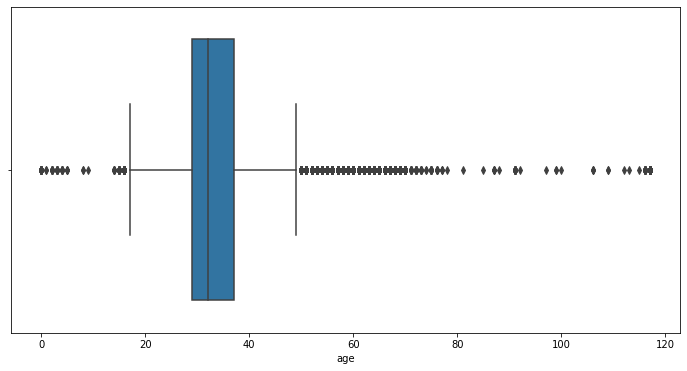

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data['age'], ax=ax)

In [24]:
# Selecting Age range 18 to 50 only
data=data[(data['age'] >= 18.0) & (data['age'] <= 50.0)]

In [25]:
data.shape

(181787, 15)

In [26]:
data.isnull().sum()

fit                   0
user_id               0
bust size         17323
item_id               0
weight            28081
rating               74
rented for           10
review_text           0
body type         13333
review_summary        0
category              0
height                0
size                  0
age                   0
review_date           0
dtype: int64

## Weight

In [27]:
data['weight'].unique()

array(['137lbs', '132lbs', '135lbs', '145lbs', '138lbs', '112lbs', nan,
       '114lbs', '120lbs', '142lbs', '118lbs', '140lbs', '170lbs',
       '143lbs', '115lbs', '123lbs', '122lbs', '165lbs', '130lbs',
       '155lbs', '105lbs', '190lbs', '150lbs', '136lbs', '174lbs',
       '125lbs', '110lbs', '160lbs', '128lbs', '180lbs', '175lbs',
       '134lbs', '109lbs', '124lbs', '250lbs', '195lbs', '231lbs',
       '161lbs', '126lbs', '210lbs', '215lbs', '220lbs', '163lbs',
       '106lbs', '178lbs', '157lbs', '185lbs', '92lbs', '117lbs',
       '146lbs', '116lbs', '141lbs', '103lbs', '121lbs', '127lbs',
       '200lbs', '111lbs', '152lbs', '172lbs', '107lbs', '133lbs',
       '248lbs', '154lbs', '153lbs', '131lbs', '156lbs', '129lbs',
       '186lbs', '100lbs', '113lbs', '148lbs', '119lbs', '166lbs',
       '144lbs', '95lbs', '234lbs', '139lbs', '230lbs', '158lbs',
       '184lbs', '102lbs', '205lbs', '168lbs', '162lbs', '108lbs',
       '147lbs', '98lbs', '225lbs', '204lbs', '89lbs', '159

In [28]:
data['weight']=data['weight'].str.replace('lbs','')

In [29]:
data['weight'].unique()

array(['137', '132', '135', '145', '138', '112', nan, '114', '120', '142',
       '118', '140', '170', '143', '115', '123', '122', '165', '130',
       '155', '105', '190', '150', '136', '174', '125', '110', '160',
       '128', '180', '175', '134', '109', '124', '250', '195', '231',
       '161', '126', '210', '215', '220', '163', '106', '178', '157',
       '185', '92', '117', '146', '116', '141', '103', '121', '127',
       '200', '111', '152', '172', '107', '133', '248', '154', '153',
       '131', '156', '129', '186', '100', '113', '148', '119', '166',
       '144', '95', '234', '139', '230', '158', '184', '102', '205',
       '168', '162', '108', '147', '98', '225', '204', '89', '159', '96',
       '176', '149', '240', '169', '260', '196', '104', '173', '179',
       '101', '239', '182', '151', '164', '218', '255', '97', '270',
       '187', '198', '90', '199', '235', '193', '192', '189', '201',
       '245', '206', '216', '167', '188', '203', '209', '224', '265',
       '276', '

In [30]:
data['weight'].nunique()

189

- **Weight Calculation using height and average adult BMI in USA**:
- The average adult male and female in the United States has a BMI of around 29.6, according to theNational Health Statistics Reports - CDC

- Reference:https://www.medicalnewstoday.com/articles/321003

In [31]:

def weight_calculator(row):
    w = row['weight']
    h = row['height']
    if pd.isnull(w):
        weight=(29.6/703)*pow(h,2)
        return (str(int(weight)))
    else:
        return w

In [32]:
new = data.apply(weight_calculator, axis = 1)
data['weight']=new

In [33]:
data.isnull().sum()

fit                   0
user_id               0
bust size         17323
item_id               0
weight                0
rating               74
rented for           10
review_text           0
body type         13333
review_summary        0
category              0
height                0
size                  0
age                   0
review_date           0
dtype: int64

In [34]:
data['weight'].unique()

array(['137', '132', '135', '145', '138', '112', '183', '114', '120',
       '142', '118', '140', '170', '143', '115', '177', '200', '123',
       '122', '167', '165', '194', '130', '155', '105', '190', '150',
       '136', '174', '125', '161', '110', '160', '128', '180', '175',
       '134', '109', '124', '189', '250', '195', '231', '172', '126',
       '210', '215', '220', '163', '156', '106', '178', '157', '185',
       '151', '92', '117', '206', '146', '116', '141', '103', '121',
       '127', '111', '152', '218', '107', '133', '248', '154', '153',
       '131', '129', '186', '100', '113', '148', '119', '166', '144',
       '95', '212', '224', '234', '139', '230', '158', '184', '102',
       '205', '168', '162', '108', '147', '98', '225', '204', '89', '159',
       '96', '176', '149', '240', '169', '260', '196', '104', '173',
       '179', '101', '239', '182', '164', '255', '97', '270', '187',
       '198', '90', '199', '235', '193', '192', '201', '245', '216',
       '188', '203',

In [35]:

data['weight']=data['weight'].astype(int)

- From the above, some values of weight are as low as 58lbs i.e 26Kg.This shows that there is a possibility of wrong entry.
- Considering the weight and height guide chart provided by  National Institute of Health of USA, the weight of a normal person with a height of 4 feet 1 inch (58 inches) ranges from 91 to 115 lbs.
- Hence, considering the data with weight above 91lbs only.
- Reference:https://www.medicalnewstoday.com/articles/323446#body-mass-index

In [36]:
# Considering the data with weight above 91lbs only.

data=data[data['weight'] >= 91]

In [37]:
data.shape

(181708, 15)

In [38]:
data.isnull().sum()

fit                   0
user_id               0
bust size         17321
item_id               0
weight                0
rating               74
rented for           10
review_text           0
body type         13333
review_summary        0
category              0
height                0
size                  0
age                   0
review_date           0
dtype: int64

## Binning

https://www.medicalnewstoday.com/articles/323446#body-mass-index

In [39]:
pd.cut(data['height'],4)

0         (66.0, 72.0]
1         (60.0, 66.0]
3         (60.0, 66.0]
4         (66.0, 72.0]
5         (66.0, 72.0]
              ...     
192539    (66.0, 72.0]
192540    (60.0, 66.0]
192541    (66.0, 72.0]
192542    (60.0, 66.0]
192543    (60.0, 66.0]
Name: height, Length: 181708, dtype: category
Categories (4, interval[float64]): [(53.976, 60.0] < (60.0, 66.0] < (66.0, 72.0] < (72.0, 78.0]]

In [40]:
pd.cut(data['weight'],4)

0         (90.791, 143.25]
1         (90.791, 143.25]
3         (90.791, 143.25]
4          (143.25, 195.5]
5         (90.791, 143.25]
                ...       
192539    (90.791, 143.25]
192540    (90.791, 143.25]
192541    (90.791, 143.25]
192542     (143.25, 195.5]
192543     (143.25, 195.5]
Name: weight, Length: 181708, dtype: category
Categories (4, interval[float64]): [(90.791, 143.25] < (143.25, 195.5] < (195.5, 247.75] <
                                    (247.75, 300.0]]

In [41]:
pd.cut(data['age'],4)

0         (26.0, 34.0]
1         (34.0, 42.0]
3         (26.0, 34.0]
4         (26.0, 34.0]
5         (42.0, 50.0]
              ...     
192539    (34.0, 42.0]
192540    (26.0, 34.0]
192541    (26.0, 34.0]
192542    (26.0, 34.0]
192543    (26.0, 34.0]
Name: age, Length: 181708, dtype: category
Categories (4, interval[float64]): [(17.968, 26.0] < (26.0, 34.0] < (34.0, 42.0] < (42.0, 50.0]]

## Body Type

- Body Type can be calculated using Bust Size, Waist Size, High Hip Size, Hip Size. 
- But the data doesn't provide the required information. Hence, dropping the null values.
- Reference: https://www.calculator.net/body-type-calculator.html

In [42]:
data['body type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple', nan], dtype=object)

In [43]:
data=data.dropna(subset=['body type'])

In [44]:
data['body type'].isnull().sum()

0

In [45]:
data['body type'].mode()

0    hourglass
dtype: object

In [46]:
data.shape

(168375, 15)

In [47]:
data.isnull().sum()

fit                   0
user_id               0
bust size         11611
item_id               0
weight                0
rating               74
rented for           10
review_text           0
body type             0
review_summary        0
category              0
height                0
size                  0
age                   0
review_date           0
dtype: int64

## Bust Size

In [48]:
data['bust size'].unique()

array(['34d', '34b', '34c', '32b', '36d', '36a', '32d+', '36c', '32c',
       '30dd', nan, '36b', '32d', '34a', '34dd', '40ddd/e', '32a', '38c',
       '34ddd/e', '38d+', '38a', '38d', '36ddd/e', '38dd', '38f', '42dd',
       '40g', '40dd', '32dd', '30ddd/e', '32ddd/e', '36dd', '36d+',
       '34d+', '40d', '28dd', '30d', '30b', '38b', '34aa', '32aa', '36f',
       '28c', '36aa', '34g', '42ddd/e', '40c', '34f', '42c', '28g',
       '28aa', '36g', '30a', '28f', '44ddd/e', '42d', '30c', '30aa',
       '44dd', '32i', '32g', '30g', '38h', '30h', '34j', '38ddd/e', '32h',
       '28a', '32f', '44d', '40h', '38g', '34h', '36j', '40f', '36h',
       '28ddd/e', '44f', '28b', '34i', '30f', '36i', '30i', '42b', '42j',
       '40b', '48d', '38i', '48dd', '28d', '46ddd/e', '42g', '44c', '42f',
       '40j', '32j', '38j', '44b', '46c', '44g', '42h', '40i', '44h'],
      dtype=object)

In [49]:
data['bust size'].nunique()

102

- As per the reference, considering the cup size and band length, 40ddd/e is equivalent to 42dd & 34d+ is equivalent to 34dd.
- Replacing the 'bust size' column accordingly.
- Reference: https://fredericks.zendesk.com/hc/en-us/articles/230299668-Bra-Cup-Equivalent

In [50]:
data['bust size'].replace({'34d+':'34dd','32d+':'32dd','38d+':'38dd','36d+':'36dd',
                           '40ddd/e':'42dd','34ddd/e':'36dd','36ddd/e':'38dd','30ddd/e':'32dd',
                          '32ddd/e':'34dd','42ddd/e':'44dd','44ddd/e':'46dd','38ddd/e':'40dd',
                          '28ddd/e':'30dd','46ddd/e':'48dd'},inplace=True)

In [51]:
data['bust size'].nunique()

89

In [52]:
data['bust size'].unique()

array(['34d', '34b', '34c', '32b', '36d', '36a', '32dd', '36c', '32c',
       '30dd', nan, '36b', '32d', '34a', '34dd', '42dd', '32a', '38c',
       '36dd', '38dd', '38a', '38d', '38f', '40g', '40dd', '40d', '28dd',
       '30d', '30b', '38b', '34aa', '32aa', '36f', '28c', '36aa', '34g',
       '44dd', '40c', '34f', '42c', '28g', '28aa', '36g', '30a', '28f',
       '46dd', '42d', '30c', '30aa', '32i', '32g', '30g', '38h', '30h',
       '34j', '32h', '28a', '32f', '44d', '40h', '38g', '34h', '36j',
       '40f', '36h', '44f', '28b', '34i', '30f', '36i', '30i', '42b',
       '42j', '40b', '48d', '38i', '48dd', '28d', '42g', '44c', '42f',
       '40j', '32j', '38j', '44b', '46c', '44g', '42h', '40i', '44h'],
      dtype=object)

In [53]:
data.shape

(168375, 15)

- Bust Size is generally calculated using band size, but the data doesn't provide the required information. 
- Hence, dropping the null values.
- Reference: https://www.victoriassecret.com/us/vs/bras/how-to-measure-bras

In [54]:
data=data.dropna(subset=['bust size'])

## Rented for

In [55]:
data['rented for'].unique()

array(['vacation', 'other', 'formal affair', 'wedding', 'date',
       'everyday', 'party', 'work', nan, 'party: cocktail'], dtype=object)

In [56]:
data['rented for'].value_counts()

wedding            46926
formal affair      32360
party              29232
everyday           13747
work               12479
other              12330
date                6292
vacation            3390
party: cocktail        1
Name: rented for, dtype: int64

In [57]:
data['rented for'].replace({'party: cocktail':'party'},inplace=True)

In [58]:
# Only 10 values are missing, using mode imputation

data['rented for'].mode()

0    wedding
dtype: object

In [59]:
data['rented for']=data['rented for'].fillna(data['rented for'].mode()[0])

## Category

In [60]:
data['category'].unique()

array(['romper', 'gown', 'dress', 'sheath', 'leggings', 'top', 'sweater',
       'jacket', 'shirtdress', 'jumpsuit', 'shift', 'shirt', 'mini',
       'skirt', 'maxi', 'blouse', 'pants', 'suit', 'coat', 'trench',
       'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown', 'tank',
       'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'combo',
       'henley', 'tee', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 'pullover', 't-shirt', 'caftan', 'tight',
       'kimono', 'for', 'crewneck', 'skirts', 'parka', 'buttondown',
       'skort', 'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

In [61]:
data['category'].nunique()

68

In [62]:
# Check for Nulls post cleaning

data.isnull().sum()

fit                0
user_id            0
bust size          0
item_id            0
weight             0
rating            61
rented for         0
review_text        0
body type          0
review_summary     0
category           0
height             0
size               0
age                0
review_date        0
dtype: int64

In [63]:
data.shape

(156764, 15)

In [64]:
data['user_id'].nunique()

83817

In [65]:
data['item_id'].nunique()

5760

# Data Visualisation

In [66]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,"June 18, 2013"
3,fit,909926,34c,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,"September 26, 2016"
5,fit,734848,32b,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,"April 30, 2016"


## Binning of Age

In [67]:
bins=[18,22,27,31,36,41,46,51]
labels=['18-22','22-27','27-31','31-36','36-41','41-46','46-51']
data['age_bin']=pd.cut(data['age'],bins,labels=labels)

## Rented for Vs Age Bin 

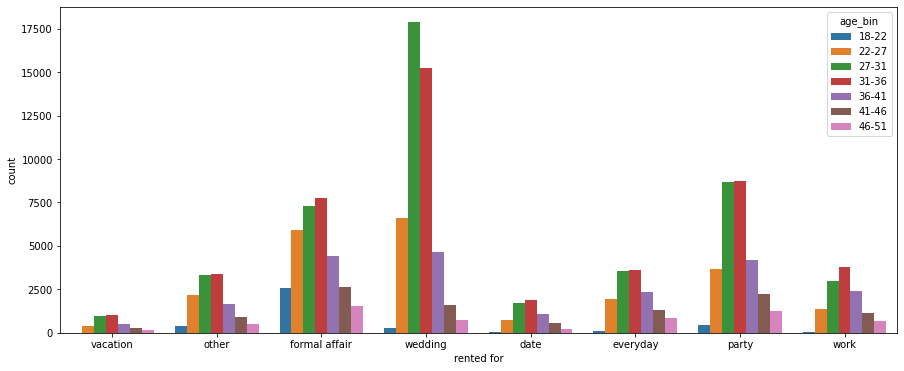

In [68]:
fig, ax = plt.subplots(figsize=(15,6))
graph = sns.countplot(x="rented for", hue="age_bin", data=data,ax=ax)

In [69]:
pd.crosstab(index=data['age_bin'],columns=data['body type'])

body type,apple,athletic,full bust,hourglass,pear,petite,straight & narrow
age_bin,,,,,,,
18-22,68,1056,196,1102,416,568,565
22-27,379,5557,1635,6765,2839,3161,2464
27-31,931,11600,3747,14140,6047,6414,3500
31-36,1290,11393,3562,14508,5695,5437,3535
36-41,812,5293,1750,6601,2796,2379,1605
41-46,369,2485,957,3599,1348,1188,731
46-51,239,1541,632,1980,609,503,482


## Body Type Vs Age Bin

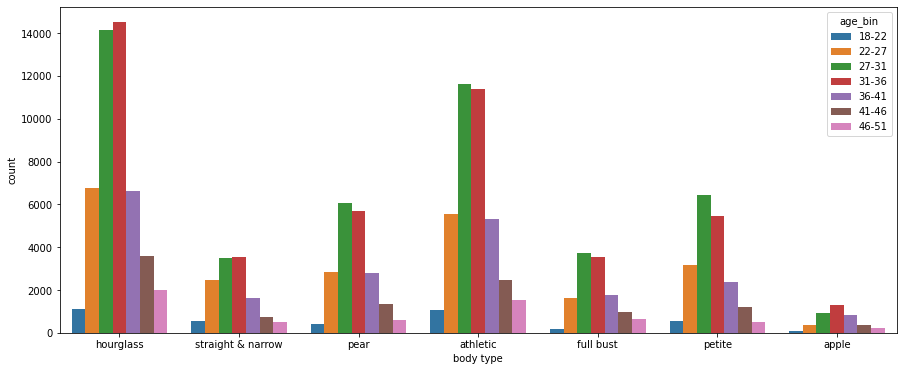

In [70]:
fig, ax = plt.subplots(figsize=(15,6))
graph = sns.countplot(x="body type", hue="age_bin", data=data,ax=ax)

## Top 25 clothing rented

In [71]:
itemid_top=data['item_id'].value_counts().reset_index()
itemid_top.columns=['item_id','count']
itemid_top=itemid_top.sort_values('count',ascending=False)
itemid_top25=itemid_top.iloc[:25,:]
itemid_top25 = itemid_top25.reset_index(drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

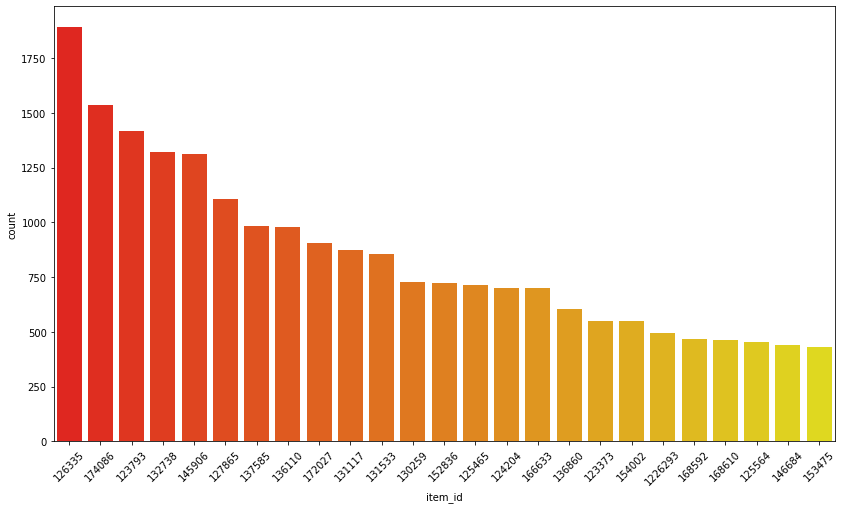

In [72]:
plt.figure(figsize=(14,8))
sns.barplot(x='item_id',y='count',data=itemid_top25,
           order=itemid_top25.sort_values('count',ascending=False).item_id,
           palette="autumn")
plt.xticks(rotation=45)

In [73]:
data_rented=data['rented for'].value_counts().reset_index()
data_rented.columns=['rented for','count']
data_rented

,rented for,count
0,wedding,46933
1,formal affair,32360
2,party,29233
3,everyday,13747
4,work,12479
5,other,12330
6,date,6292
7,vacation,3390


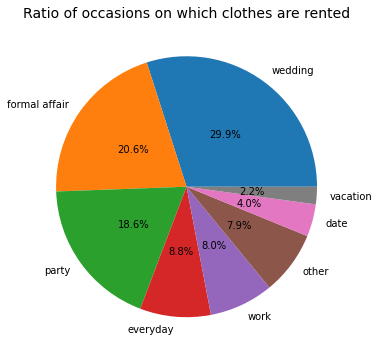

In [74]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data_rented['count'], autopct="%.1f%%",
        labels=data_rented['rented for'], pctdistance=(0.5))
plt.title("Ratio of occasions on which clothes are rented", fontsize=14);

In [75]:
d1=data.groupby(['rented for','item_id']).agg({'item_id':'count'})
d1.columns=['count']
d1=d1.reset_index()
d1

,rented for,item_id,count
0,date,123373,2
1,date,123793,7
2,date,124204,15
3,date,124553,38
4,date,125424,21
...,...,...,...
21749,work,2960969,9
21750,work,2963850,3
21751,work,2964470,1
21752,work,2965924,1


In [76]:
def weight_calculator(row):
    w = row['weight']
    h = row['height']
    if pd.isnull(w):
        weight=(29.6/703)*pow(h,2)
        return (str(int(weight)))
    else:
        return w

In [77]:
new = data.apply(weight_calculator, axis = 1)
itemid_top25.item_id

0      126335
1      174086
2      123793
3      132738
4      145906
5      127865
6      137585
7      136110
8      172027
9      131117
10     131533
11     130259
12     152836
13     125465
14     124204
15     166633
16     136860
17     123373
18     154002
19    1226293
20     168592
21     168610
22     125564
23     146684
24     153475
Name: item_id, dtype: int64

# Sentiment Analysis
- To find out the the sentiment behind the customer reviews

In [78]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Obtaining Sentiment using Compound Score using Vader Sentiment Analysis

In [79]:
def get_sentiment(review):
    polarity = analyser.polarity_scores(review)
    if(polarity['compound']>=0.05):
        return "Highly Positive"
    elif(polarity['compound']>=0.25):
        return "Positive"
    elif(polarity['compound']<=-0.25):
        return "Negative"
    elif(polarity['compound']<=-0.05):
        return "Highly Negative"
    else:
        return "Neutral"

In [80]:
#data['sentiment'] = data.clean_review.apply(get_sentiment)
#data = data.iloc[:10000]


In [81]:
data['sentiment'] = data.review_text.apply(get_sentiment)

## Missing Rating fill trying

In [82]:
data.shape

(156764, 17)

In [83]:
data.columns

Index(['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date', 'age_bin', 'sentiment'],
      dtype='object')

In [84]:
data['rating'].value_counts()

10.0    100702
8.0      43914
6.0       8922
4.0       2325
2.0        840
Name: rating, dtype: int64

In [85]:
data['sentiment'].value_counts()

Highly Positive    147725
Neutral              3762
Negative             3737
Highly Negative      1540
Name: sentiment, dtype: int64

In [86]:
def get_rating(text):
    if(text=='Highly Positive'):
        return 10.0
    elif(text=='Positive'):
        return 8.0
    elif(text=='Neutral'):
        return 6.0
    elif(text=='Negative'):
        return 4.0
    else:
        return 2.0

In [87]:
data['rating'] = data['rating'].replace(np.nan,0.0)

for i in range(len(data)):
        if data.iloc[i,5] == 0.0:
            data.iloc[i,5] = get_rating(data.iloc[i,16])

In [88]:
data['rating'].value_counts()

10.0    100759
8.0      43914
6.0       8924
4.0       2327
2.0        840
Name: rating, dtype: int64

In [89]:
data.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,age_bin,sentiment
0,fit,420272,34d,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,"April 20, 2016",27-31,Highly Positive
1,fit,273551,34b,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,"June 18, 2013",31-36,Highly Positive
3,fit,909926,34c,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,"February 12, 2014",31-36,Highly Positive
4,fit,151944,34b,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,"September 26, 2016",22-27,Highly Positive
5,fit,734848,32b,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,"April 30, 2016",41-46,Highly Positive


In [90]:
data.isnull().sum()

fit                 0
user_id             0
bust size           0
item_id             0
weight              0
rating              0
rented for          0
review_text         0
body type           0
review_summary      0
category            0
height              0
size                0
age                 0
review_date         0
age_bin           295
sentiment           0
dtype: int64

In [91]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/cleaned_project_data.csv')

# Building Recommendation Systems

In [92]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/cleaned_project_data.csv')

## Clustering of the users usong K-Means Clustering

In [93]:
data

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,age_bin,sentiment
0,0,fit,420272,34d,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,"April 20, 2016",27-31,Highly Positive
1,1,fit,273551,34b,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,"June 18, 2013",31-36,Highly Positive
2,3,fit,909926,34c,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,"February 12, 2014",31-36,Highly Positive
3,4,fit,151944,34b,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,"September 26, 2016",22-27,Highly Positive
4,5,fit,734848,32b,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,"April 30, 2016",41-46,Highly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156759,192539,fit,66386,34dd,2252812,140,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69.0,8,42.0,"May 18, 2016",41-46,Highly Positive
156760,192540,fit,118398,32c,682043,100,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.0,4,29.0,"September 30, 2016",27-31,Highly Positive
156761,192541,fit,47002,36a,683251,135,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68.0,8,31.0,"March 4, 2016",27-31,Highly Positive
156762,192542,fit,961120,36c,126335,165,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66.0,16,31.0,"November 25, 2015",27-31,Highly Positive


In [94]:
score_dict = {
    "Highly Positive" : 10,
    "Positive" : 8,
    "Neutral" : 6,
    "Negative" : 4,
    "Highly Negative" : 2
}
data['sentiment_rating'] = data['sentiment'].apply(lambda item: score_dict[item])

In [95]:
print((data['sentiment_rating'] == data['rating']).sum() / data.shape[0])

0.6276759970401368


In [96]:
data['compound_rating'] = round(data['rating']*0.6 + data['sentiment_rating']*0.4)

In [97]:
data.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,age_bin,sentiment,sentiment_rating,compound_rating
0,0,fit,420272,34d,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,"April 20, 2016",27-31,Highly Positive,10,10.0
1,1,fit,273551,34b,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,"June 18, 2013",31-36,Highly Positive,10,10.0
2,3,fit,909926,34c,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,"February 12, 2014",31-36,Highly Positive,10,9.0
3,4,fit,151944,34b,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,"September 26, 2016",22-27,Highly Positive,10,10.0
4,5,fit,734848,32b,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,"April 30, 2016",41-46,Highly Positive,10,9.0


In [98]:
data

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,age_bin,sentiment,sentiment_rating,compound_rating
0,0,fit,420272,34d,2260466,137,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,68.0,14,28.0,"April 20, 2016",27-31,Highly Positive,10,10.0
1,1,fit,273551,34b,153475,132,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,66.0,12,36.0,"June 18, 2013",31-36,Highly Positive,10,10.0
2,3,fit,909926,34c,126335,135,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,65.0,8,34.0,"February 12, 2014",31-36,Highly Positive,10,9.0
3,4,fit,151944,34b,616682,145,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,69.0,12,27.0,"September 26, 2016",22-27,Highly Positive,10,10.0
4,5,fit,734848,32b,364092,138,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,68.0,8,45.0,"April 30, 2016",41-46,Highly Positive,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156759,192539,fit,66386,34dd,2252812,140,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,69.0,8,42.0,"May 18, 2016",41-46,Highly Positive,10,10.0
156760,192540,fit,118398,32c,682043,100,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,61.0,4,29.0,"September 30, 2016",27-31,Highly Positive,10,10.0
156761,192541,fit,47002,36a,683251,135,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,68.0,8,31.0,"March 4, 2016",27-31,Highly Positive,10,8.0
156762,192542,fit,961120,36c,126335,165,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,66.0,16,31.0,"November 25, 2015",27-31,Highly Positive,10,10.0


In [99]:
data=data.sample(n=20000)

data_clus=data[['user_id','item_id','age','height','weight']]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

col_names = data_clus.columns
data_clus=sc.fit_transform(data_clus)

data_clus=pd.DataFrame(data_clus)
data_clus.columns=col_names
data_clus

,user_id,item_id,age,height,weight
0,-0.328807,-1.103388,-1.275792,0.260476,0.510343
1,1.057594,1.011139,-0.791550,0.260476,2.700066
2,0.777884,-0.510726,-1.275792,-0.495075,-1.480315
3,-0.864474,0.746865,-0.630136,0.638252,-0.405360
4,-1.425075,-0.708034,1.145418,1.393804,-0.285920
...,...,...,...,...,...
19995,1.060424,-0.135369,-0.630136,-0.495075,0.311277
19996,-1.459507,0.426109,2.275316,0.260476,-1.082183
19997,-0.557464,0.207847,-0.791550,-0.117299,0.112211
19998,1.345870,-0.137770,-0.630136,0.638252,0.908474


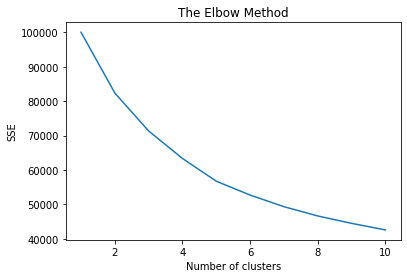

In [100]:
from sklearn.cluster import KMeans
X=data_clus

ls=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ls.append(km.inertia_)
    
plt.plot(range(1,11),ls)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [101]:
km=KMeans(n_clusters=5,init='k-means++')
y_kmeans=km.fit_predict(X)

In [102]:
data['cluster']=y_kmeans
data['cluster'].value_counts()

0    4635
2    4568
4    4070
1    3912
3    2815
Name: cluster, dtype: int64

In [103]:
cluster_0=data[data['cluster']==0]
cluster_1=data[data['cluster']==1]
cluster_2=data[data['cluster']==2]
cluster_3=data[data['cluster']==3]
cluster_4=data[data['cluster']==4]

In [104]:
cluster_list=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [105]:
cluster_4[['user_id','item_id','rating','sentiment','sentiment_rating','compound_rating','cluster']]

,user_id,item_id,rating,sentiment,sentiment_rating,compound_rating,cluster
152277,251483,1652750,10.0,Highly Positive,10,10.0,4
53755,385244,2508510,10.0,Highly Positive,10,10.0,4
462,442636,1787191,10.0,Highly Positive,10,10.0,4
52799,234262,1991314,10.0,Highly Positive,10,10.0,4
54690,130401,2807362,10.0,Highly Positive,10,10.0,4
...,...,...,...,...,...,...,...
55640,105589,1675905,10.0,Highly Positive,10,10.0,4
41842,688355,2885734,10.0,Highly Positive,10,10.0,4
105330,228321,1800249,4.0,Negative,4,4.0,4
68728,689905,1636171,10.0,Highly Positive,10,10.0,4


## 1. Product Popularity based Recommendation System 

### 10 most popular items rented for wedding in each customer cluster

In [106]:
index = 0
for cluster in cluster_list:
    cluster_wedding=cluster[cluster['rented for']=='wedding']
    popular_items = pd.DataFrame(cluster_wedding.groupby('item_id')['rating'].count())
    most_popular_items = popular_items.sort_values('rating', ascending=False)
    print('The 10 most popular items rented for wedding in ',"cluster {}".format(index),'are:')
    print(most_popular_items.head(10))
    index = index + 1

The 10 most popular items rented for wedding in  cluster 0 are:
         rating
item_id        
174086       45
126335       21
136860       21
137585       20
166633       18
127865       17
123793       16
131117       16
125465       14
136110       13
The 10 most popular items rented for wedding in  cluster 1 are:
         rating
item_id        
174086       31
126335       31
136110       21
136860       20
145906       18
131533       16
132738       15
131117       15
144051       14
130259       12
The 10 most popular items rented for wedding in  cluster 2 are:
         rating
item_id        
174086       54
137585       30
136860       23
172027       21
131533       21
136110       21
131117       20
127865       20
126335       18
123793       16
The 10 most popular items rented for wedding in  cluster 3 are:
         rating
item_id        
127865       10
126335        9
168610        6
136860        6
531077        5
1793377       5
174086        5
1545760       4
148089  

### 10 most popular items rented for formal affair in each customer cluster

In [107]:
index = 0
for cluster in cluster_list:
    cluster_formal_affair=cluster[cluster['rented for']=='formal affair']
    popular_items = pd.DataFrame(cluster_formal_affair.groupby('item_id')['rating'].count())
    most_popular_items = popular_items.sort_values('rating', ascending=False)
    print('The 10 most popular items rented for formal affair in ',"cluster {}".format(index),'are:')
    print(most_popular_items.head(10))
    index = index + 1

The 10 most popular items rented for formal affair in  cluster 0 are:
         rating
item_id        
123793       36
145906       31
132738       28
154002       19
125465       18
131533       17
127865       16
126335       15
131117       14
146684       12
The 10 most popular items rented for formal affair in  cluster 1 are:
         rating
item_id        
132738       46
126335       31
145906       29
131117       27
142179       20
127865       18
131533       17
123793       16
123373       15
125465       15
The 10 most popular items rented for formal affair in  cluster 2 are:
         rating
item_id        
145906       46
123793       43
132738       42
127865       27
144714       21
126335       20
146684       20
131117       20
154002       15
137585       13
The 10 most popular items rented for formal affair in  cluster 3 are:
         rating
item_id        
127865       21
125564       16
142179       14
131533       12
144714       11
139086       11
153475       10


## 2. Collabrative Filtering based Recommendation System

 ### Model without Compound Rating

In [108]:
!pip install scikit-surprise

In [109]:
from surprise import Dataset
from surprise import Reader
from surprise import NormalPredictor, SVD, KNNBasic 
from surprise.model_selection import train_test_split
from surprise import accuracy


In [110]:
index = 0
for cluster in cluster_list:
  reader = Reader(rating_scale=(0,10))
  clusRec = Dataset.load_from_df(cluster[['user_id', 'item_id', 'rating']], reader)
  trainset, testset = train_test_split(clusRec, test_size=.25)
  
  for algorithm in [NormalPredictor(), KNNBasic(), SVD()]:
    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print(algorithm)
    print('Model accuracy for',"cluster {}".format(index),'is: ')
    model_accuracy=accuracy.rmse(predictions)
    
  index = index + 1


Model accuracy for cluster 0 is: 
RMSE: 1.7858
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 0 is: 
RMSE: 1.3784
Model accuracy for cluster 0 is: 
RMSE: 1.3702
Model accuracy for cluster 1 is: 
RMSE: 1.8941
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 1 is: 
RMSE: 1.5321
Model accuracy for cluster 1 is: 
RMSE: 1.5363
Model accuracy for cluster 2 is: 
RMSE: 1.8260
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 2 is: 
RMSE: 1.4777
Model accuracy for cluster 2 is: 
RMSE: 1.4630
Model accuracy for cluster 3 is: 
RMSE: 1.9160
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 3 is: 
RMSE: 1.4342
Model accuracy for cluster 3 is: 
RMSE: 1.4285
Model accuracy for cluster 4 is: 
RMSE: 1.8363
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for clust

### Cross Validation

In [111]:
from surprise.model_selection import cross_validate

In [112]:
from collections import defaultdict

def get_Top_N(predictions, n=10):
    top_n = defaultdict(list)
    for user_id, item_id, _, estimated_rating, _ in predictions:
        top_n[user_id].append((item_id, estimated_rating))

    for user_id, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_id] = user_ratings[:n]

    return top_n

In [113]:
index = 0
for cluster in cluster_list:
  reader = Reader(rating_scale=(0,10))
  clusRec = Dataset.load_from_df(cluster[['user_id', 'item_id', 'rating']], reader)
  
  # Fit
  trainset = clusRec.build_full_trainset()
  algorithm = SVD()
  algorithm.fit(trainset)

  # Evaluation and Cross Validation
  print("Cross Validation for cluster {}".format(index))
  cross_validate(algorithm, clusRec, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  # Prediction
  testset = trainset.build_anti_testset()
  predictions = algorithm.test(testset)

  # Top 10 prediction for each user in the cluster
  top_n = get_Top_N(predictions, n=10)

  df_list = []
  for uid, user_ratings in top_n.items():
    new_row = [uid]
    new_row += [iid for (iid, _) in user_ratings]
    df_list.append(new_row)
  
  result_cluster=pd.DataFrame(df_list)
  result_cluster.columns=['user_id',1,2,3,4,5,6,7,8,9,10]
  print("The Top 10 Product Recommendation of each user in cluster {}".format(index))
  print(result_cluster)

  index = index + 1

Cross Validation for cluster 0
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4180  1.3242  1.3713  1.3702  1.4229  1.3814  0.0362  
MAE (testset)     1.1391  1.1038  1.1316  1.1338  1.1485  1.1314  0.0150  
Fit time          0.27    0.29    0.27    0.27    0.27    0.27    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
The Top 10 Product Recommendation of each user in cluster 0
      user_id        1        2        3  ...        7        8        9       10
0      725601   123793   162634   709832  ...   124204   137585   452942  1325648
1      810256   123793  1524171   162634  ...   125465   128959  1142945   137585
2      710352   123793   124204  1859039  ...  1773535  1093026  1210233   709832
3      895454   123793   709832   124204  ...   131533   125465   132135  1210233
4      822475   123793   709832   125465  ...   124204   278104   1660

### Model with Compound Rating

In [114]:
index = 0
for cluster in cluster_list:
  reader = Reader(rating_scale=(0,10))
  clusRec = Dataset.load_from_df(cluster[['user_id', 'item_id', 'compound_rating']], reader)
  trainset, testset = train_test_split(clusRec, test_size=.25)
  
  for algorithm in [NormalPredictor(), KNNBasic(), SVD()]:
    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print(algorithm)
    print('Model accuracy for',"cluster {}".format(index),'is: ')
    model_accuracy=accuracy.rmse(predictions)
    
  index = index + 1

Model accuracy for cluster 0 is: 
RMSE: 1.3123
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 0 is: 
RMSE: 0.9572
Model accuracy for cluster 0 is: 
RMSE: 0.9535
Model accuracy for cluster 1 is: 
RMSE: 1.3613
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 1 is: 
RMSE: 1.0035
Model accuracy for cluster 1 is: 
RMSE: 1.0105
Model accuracy for cluster 2 is: 
RMSE: 1.2704
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 2 is: 
RMSE: 0.9950
Model accuracy for cluster 2 is: 
RMSE: 1.0000
Model accuracy for cluster 3 is: 
RMSE: 1.4339
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for cluster 3 is: 
RMSE: 1.1539
Model accuracy for cluster 3 is: 
RMSE: 1.1554
Model accuracy for cluster 4 is: 
RMSE: 1.4588
Computing the msd similarity matrix...
Done computing similarity matrix.
Model accuracy for clust

In [115]:
index = 0
for cluster in cluster_list:
  reader = Reader(rating_scale=(0,10))
  clusRec = Dataset.load_from_df(cluster[['user_id', 'item_id', 'compound_rating']], reader)
  
  # Fit
  trainset = clusRec.build_full_trainset()
  algorithm = SVD()
  algorithm.fit(trainset)

  # Evaluation and Cross Validation
  print("Cross Validation for cluster {}".format(index))
  cross_validate(algorithm, clusRec, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  # Prediction
  testset = trainset.build_anti_testset()
  predictions = algorithm.test(testset)

  # Top 10 prediction for each user in the cluster
  top_n = get_Top_N(predictions, n=10)

  df_list = []
  for uid, user_ratings in top_n.items():
    new_row = [uid]
    new_row += [iid for (iid, _) in user_ratings]
    df_list.append(new_row)
  
  result_cluster=pd.DataFrame(df_list)
  result_cluster.columns=['user_id',1,2,3,4,5,6,7,8,9,10]
  print("The Top 10 Product Recommendation of each user in cluster {}".format(index))
  print(result_cluster)

  index = index + 1

Cross Validation for cluster 0
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0458  1.0411  1.0093  1.0108  0.9933  1.0200  0.0201  
MAE (testset)     0.7372  0.7302  0.7148  0.7108  0.7125  0.7211  0.0106  
Fit time          0.29    0.28    0.29    0.28    0.27    0.28    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
The Top 10 Product Recommendation of each user in cluster 0
      user_id        1        2        3  ...        7        8        9       10
0      725601   124204   123793  1064397  ...   522755   870184   675714   138431
1      810256   709832   138431   755371  ...  1487957   427952  1630499  1390469
2      710352   755371  1859039  1064397  ...   833666   859889   675714   124204
3      895454   125465   138431   124204  ...   915043  1334728   123793   432275
4      822475   123793  1213752   124204  ...   128959   131533   1680

In [116]:
cluster_4['user_id'].value_counts()

691468    19
45337     18
362951    14
32925     11
733207     7
          ..
19365      1
445695     1
705803     1
919983     1
180224     1
Name: user_id, Length: 3485, dtype: int64